In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('../data/processed/gurgaon_properties_missing_value_imputation.csv')

In [7]:
df.shape

(3503, 18)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,maa bhagwati residency,sector 7,0.45,5000.0,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28
1,flat,apna enclave,sector 3,0.50,7692.0,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37
2,flat,tulsiani easy in homes,sohna road,0.40,6722.0,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36
3,flat,smart world orchard,sector 61,1.47,12250.0,2,2,2,2.0,Under Construction,1333.0,1,0,0,0,0,0,76
4,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0


In [9]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [10]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 7,0.45,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28
1,flat,sector 3,0.50,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37
2,flat,sohna road,0.40,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36
3,flat,sector 61,1.47,2,2,2,2.0,Under Construction,1333.0,1,0,0,0,0,0,76
4,flat,sector 92,0.70,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0


### luxury score

<Axes: ylabel='luxury_score'>

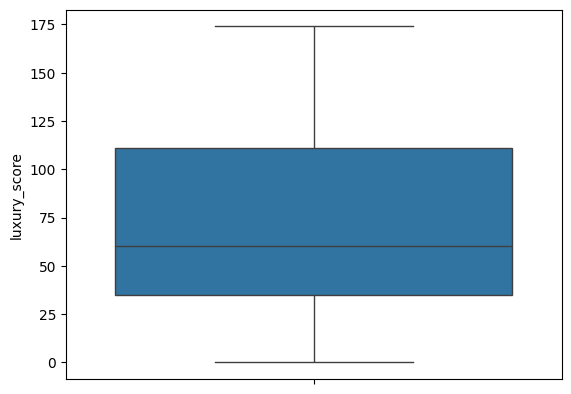

In [11]:
sns.boxplot(df['luxury_score'])

In [12]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [13]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 7,0.45,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28,Low
1,flat,sector 3,0.50,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37,Low
2,flat,sohna road,0.40,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36,Low
3,flat,sector 61,1.47,2,2,2,2.0,Under Construction,1333.0,1,0,0,0,0,0,76,Medium
4,flat,sector 92,0.70,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0,Low


### floorNum

<Axes: ylabel='floorNum'>

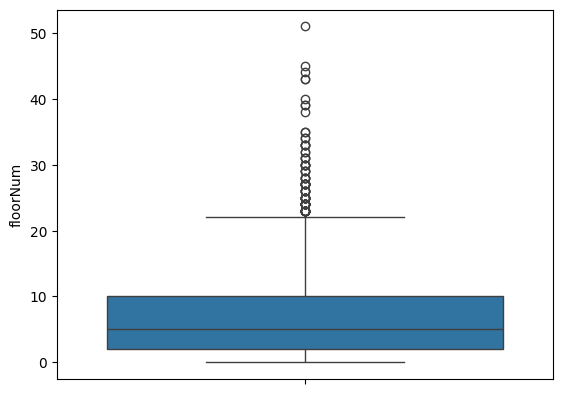

In [15]:
sns.boxplot(df['floorNum'])

In [16]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [17]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [18]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 7,0.45,2,2,1,4.0,Relatively New,1000.0,0,0,0,0,0,0,28,Low,Mid Floor
1,flat,sector 3,0.50,2,2,1,1.0,Old Property,722.0,0,0,0,0,0,2,37,Low,Low Floor
2,flat,sohna road,0.40,2,2,3,12.0,New Property,661.0,0,0,0,0,0,0,36,Low,High Floor
3,flat,sector 61,1.47,2,2,2,2.0,Under Construction,1333.0,1,0,0,0,0,0,76,Medium,Low Floor
4,flat,sector 92,0.70,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,0,0,Low,Mid Floor


In [19]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [20]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 7,0.45,2,2,1,Relatively New,1000.0,0,0,0,0,0,0,Low,Mid Floor
1,flat,sector 3,0.50,2,2,1,Old Property,722.0,0,0,0,0,0,2,Low,Low Floor
2,flat,sohna road,0.40,2,2,3,New Property,661.0,0,0,0,0,0,0,Low,High Floor
3,flat,sector 61,1.47,2,2,2,Under Construction,1333.0,1,0,0,0,0,0,Medium,Low Floor
4,flat,sector 92,0.70,2,2,3,Under Construction,1217.0,1,0,0,0,0,0,Low,Mid Floor


In [21]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [22]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,81.0,2,2,1.0,3.0,1000.000000,0,0,0,0,0,0,1.0,2.0
1,0.0,36.0,2,2,1.0,2.0,722.000000,0,0,0,0,0,2,1.0,1.0
2,0.0,113.0,2,2,3.0,1.0,661.000000,0,0,0,0,0,0,1.0,0.0
3,0.0,71.0,2,2,2.0,4.0,1333.000000,1,0,0,0,0,0,2.0,1.0
4,0.0,107.0,2,2,3.0,4.0,1217.000000,1,0,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,1.0,66.0,3,3,3.0,0.0,1650.050370,0,0,1,0,0,2,2.0,1.0
3499,1.0,33.0,4,4,3.0,0.0,1799.973819,1,1,0,1,0,0,2.0,1.0
3500,1.0,32.0,3,2,3.0,2.0,1350.020647,1,0,0,0,0,0,1.0,1.0
3501,1.0,33.0,3,3,2.0,0.0,1350.013500,1,1,0,0,0,0,2.0,1.0


In [23]:
y_label

0       0.45
1       0.50
2       0.40
3       1.47
4       0.70
        ... 
3498    4.75
3499    5.50
3500    4.25
3501    4.50
3502    3.25
Name: price, Length: 3503, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

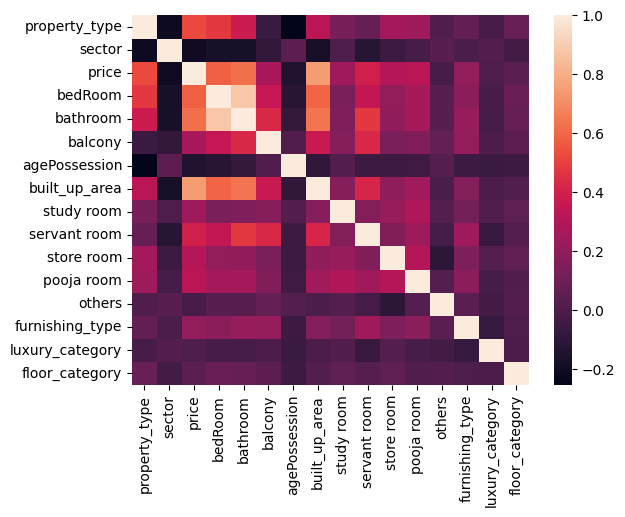

In [24]:
 sns.heatmap(data_label_encoded.corr())

In [25]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.202447
1,price,1.000000
2,bedRoom,0.579413
3,bathroom,0.618460
4,balcony,0.268988
5,agePossession,-0.141151
6,built_up_area,0.747377
7,study room,0.241647
8,servant room,0.394311
9,store room,0.308984


### Technique 2 - Random Forest Feature Importance

In [26]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.654607
1,sector,0.105942
0,property_type,0.097069
3,bathroom,0.025850
2,bedRoom,0.022372
8,servant room,0.022266
5,agePossession,0.015553
4,balcony,0.011692
10,pooja room,0.007794
12,furnishing_type,0.007229


### Technique 3 - Gradient Boosting Feature importances

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.683399
1,sector,0.099192
0,property_type,0.094183
2,bedRoom,0.041003
8,servant room,0.031313
3,bathroom,0.028877
9,store room,0.005513
5,agePossession,0.004592
10,pooja room,0.002829
7,study room,0.002603


### Technique 4 - Permutation Importance

In [28]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.760196
0,property_type,0.183070
1,sector,0.166398
8,servant room,0.018059
3,bathroom,0.015601
7,study room,0.005872
4,balcony,0.005807
2,bedRoom,0.004108
10,pooja room,0.002372
5,agePossession,0.001655


### Technique 5 - LASSO

In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.480352
0,property_type,0.754650
3,bathroom,0.468206
9,store room,0.200498
7,study room,0.165097
8,servant room,0.150872
12,furnishing_type,0.133177
10,pooja room,0.099179
13,luxury_category,0.037269
14,floor_category,-0.000000


### Technique 6 - RFE

In [30]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.651414
1,sector,0.110117
0,property_type,0.097427
3,bathroom,0.025984
2,bedRoom,0.022904
8,servant room,0.022418
5,agePossession,0.013413
4,balcony,0.011810
9,store room,0.008426
12,furnishing_type,0.007103


### Technique 7 - Linear Regression Weights

In [33]:
# Train a linear regression model on the label-encoded and standardized training data

from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.487438
0,property_type,0.767869
3,bathroom,0.558882
9,store room,0.204740
7,study room,0.172805
8,servant room,0.150056
12,furnishing_type,0.141668
10,pooja room,0.104073
13,luxury_category,0.048385
14,floor_category,-0.007926


### Technique 8 - SHAP

In [ ]:
! pip install shap

In [34]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-0.1652225 ,  0.02363176, -0.04459613, ..., -0.00693818,
        -0.00933387, -0.01159576],
       [-0.18438873,  0.13826471, -0.05528396, ...,  0.03587281,
        -0.01094683, -0.00583205],
       [-0.18353977, -0.40896959, -0.03956827, ..., -0.00664626,
        -0.00527501,  0.01592917],
       ...,
       [ 1.48426475,  0.60586991, -0.03316958, ..., -0.00687978,
        -0.00472546,  0.00771715],
       [ 1.57154578,  0.68126408, -0.06811928, ..., -0.01780893,
         0.01872971,  0.01049586],
       [ 0.37878013,  0.20156126, -0.76065489, ..., -0.05419257,
         0.0878513 , -0.02482865]])

In [35]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.279651
0,property_type,0.461164
1,sector,0.386096
3,bathroom,0.108119
8,servant room,0.105343
2,bedRoom,0.050266
4,balcony,0.037796
5,agePossession,0.029209
14,floor_category,0.025006
12,furnishing_type,0.019038


In [36]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [37]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.202447,0.105942,0.099192,0.166398,-0.053533,0.110117,-0.062079,0.386096
bedRoom,0.579413,0.022372,0.041003,0.004108,-0.165723,0.022904,-0.265143,0.050266
bathroom,0.618460,0.025850,0.028877,0.015601,0.468206,0.025984,0.558882,0.108119
balcony,0.268988,0.011692,0.002468,0.005807,-0.033197,0.011810,-0.052788,0.037796
agePossession,-0.141151,0.015553,0.004592,0.001655,-0.013009,0.013413,-0.022100,0.029209
built_up_area,0.747377,0.654607,0.683399,0.760196,1.480352,0.651414,1.487438,1.279651
study room,0.241647,0.006840,0.002603,0.005872,0.165097,0.006664,0.172805,0.015106
servant room,0.394311,0.022266,0.031313,0.018059,0.150872,0.022418,0.150056,0.105343
store room,0.308984,0.006694,0.005513,-0.002543,0.200498,0.008426,0.204740,0.016942


In [38]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [39]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.717426
sector             0.140485
bathroom           0.031305
servant room       0.030499
bedRoom            0.024690
agePossession      0.010538
balcony            0.010524
study room         0.006202
furnishing_type    0.005653
store room         0.005651
pooja room         0.005634
floor_category     0.005271
luxury_category    0.004237
others             0.001886
dtype: float64

In [40]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,81.0,2,2,1.0,3.0,1000.000000,0,0,0,0,0,0,1.0,2.0
1,0.0,36.0,2,2,1.0,2.0,722.000000,0,0,0,0,0,2,1.0,1.0
2,0.0,113.0,2,2,3.0,1.0,661.000000,0,0,0,0,0,0,1.0,0.0
3,0.0,71.0,2,2,2.0,4.0,1333.000000,1,0,0,0,0,0,2.0,1.0
4,0.0,107.0,2,2,3.0,4.0,1217.000000,1,0,0,0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,1.0,66.0,3,3,3.0,0.0,1650.050370,0,0,1,0,0,2,2.0,1.0
3499,1.0,33.0,4,4,3.0,0.0,1799.973819,1,1,0,1,0,0,2.0,1.0
3500,1.0,32.0,3,2,3.0,2.0,1350.020647,1,0,0,0,0,0,1.0,1.0
3501,1.0,33.0,3,3,2.0,0.0,1350.013500,1,1,0,0,0,0,2.0,1.0


In [41]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [42]:
scores.mean()

0.6764249882454583

In [43]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [44]:
scores.mean()

0.6759782362061872

In [45]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
#export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [46]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,81.0,2,2,1.0,3.0,1000.000000,0,0,0,1.0,2.0,0.45
1,0.0,36.0,2,2,1.0,2.0,722.000000,0,0,2,1.0,1.0,0.50
2,0.0,113.0,2,2,3.0,1.0,661.000000,0,0,0,1.0,0.0,0.40
3,0.0,71.0,2,2,2.0,4.0,1333.000000,0,0,0,2.0,1.0,1.47
4,0.0,107.0,2,2,3.0,4.0,1217.000000,0,0,0,1.0,2.0,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3498,1.0,66.0,3,3,3.0,0.0,1650.050370,0,1,2,2.0,1.0,4.75
3499,1.0,33.0,4,4,3.0,0.0,1799.973819,1,0,0,2.0,1.0,5.50
3500,1.0,32.0,3,2,3.0,2.0,1350.020647,0,0,0,1.0,1.0,4.25
3501,1.0,33.0,3,3,2.0,0.0,1350.013500,1,0,0,2.0,1.0,4.50
